In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.871895,0.363097,0.000000,0.000000,0.714498,0.396161,0.465093
1,0.665213,0.531247,0.220794,0.309087,0.746423,1.675777,0.593582
2,0.819225,-0.054802,0.000000,0.000000,0.349273,0.735636,0.465093
3,-0.220496,-0.361025,0.129641,0.000000,0.972648,1.214102,0.370512
4,0.407500,0.645167,0.103005,0.077793,0.349273,-0.198597,0.258977
5,0.695033,0.526732,0.119234,0.000000,0.395516,-0.011512,0.176779
6,-1.312439,-1.505220,0.000000,0.000000,0.681944,1.859779,0.541836
7,-0.230401,-0.736972,0.112309,0.000000,0.395516,-0.984649,0.111535
8,0.200020,0.054739,0.064135,0.137486,0.725208,0.474124,0.482047
9,-0.787443,-0.501038,0.000000,0.000000,0.465671,-0.424837,0.176779


In [3]:
X = dataset.drop(columns=['guests']).values
Y = dataset['guests'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 6


first_hidden_layer_size = 6
second_hidden_layer_size = 6

output_layer_size = 1


epochs_number = 50
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1819 samples, validate on 455 samples
Epoch 1/50
1819/1819 [==============================] - 1s 338us/step - loss: 0.8711 - mean_absolute_error: 0.7468 - mean_squared_error: 0.8711 - val_loss: 0.6920 - val_mean_absolute_error: 0.6624 - val_mean_squared_error: 0.6920
Epoch 2/50
1819/1819 [==============================] - 0s 174us/step - loss: 0.6137 - mean_absolute_error: 0.6145 - mean_squared_error: 0.6137 - val_loss: 0.5563 - val_mean_absolute_error: 0.5920 - val_mean_squared_error: 0.5563
Epoch 3/50
1819/1819 [==============================] - 0s 181us/step - loss: 0.5223 - mean_absolute_error: 0.5613 - mean_squared_error: 0.5223 - val_loss: 0.5145 - val_mean_absolute_error: 0.5626 - val_mean_squared_error: 0.5145
Epoch 4/50
1819/1819 [==============================] - 0s 167us/step - loss: 0.4805 - mean_absolute_error: 0.5342 - mean_squared_error: 0.4805 - val_loss: 0.4740 - val_mean_absolute_error: 0.5421 - val_mean_squared_error: 0.4740
Epoch 5/50
1819/1819 [===========

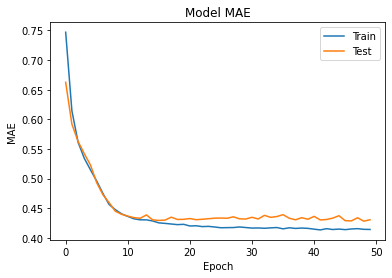

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

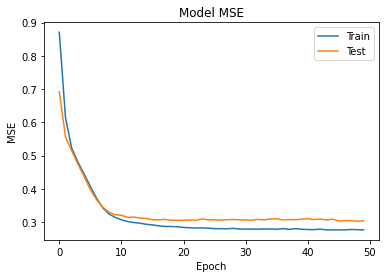

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

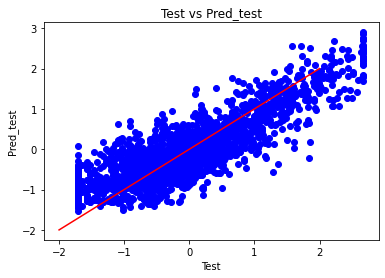

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

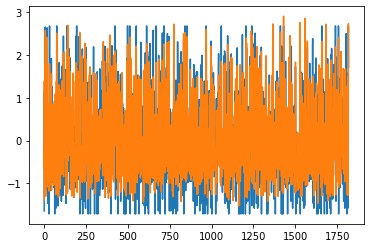

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

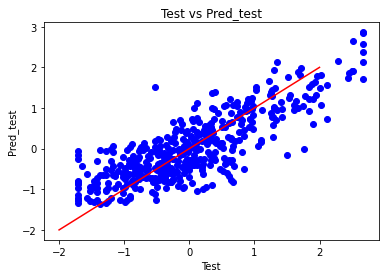

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

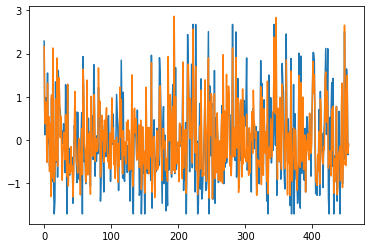

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.5228910129490459
0.5512230852779546


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9966646432876587, p = 0.0005433728219941258
Test k = 0.9950842261314392, p = 0.15846769511699677


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9978408217430115, p_s = 0.003453698940575123
k_n = 11.025806135221671, p_n = 0.004034378293336015


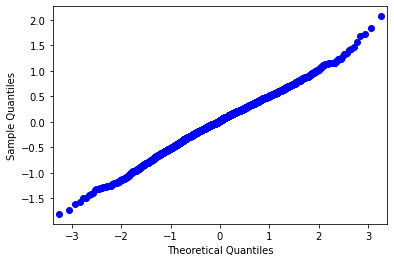

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

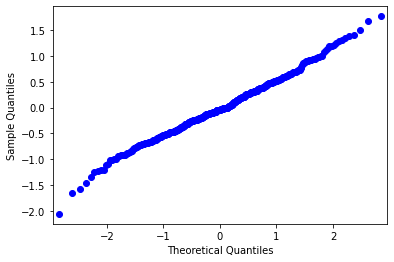

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

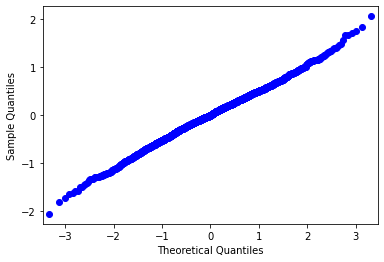

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

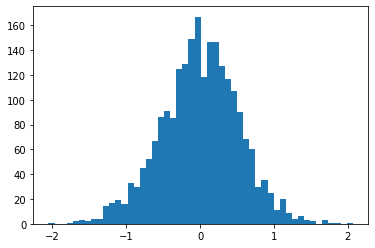

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')